In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from csv file
df = pd.read_csv('Linear Regression_ Problem Data Set.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
#handling null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
#removing unwanted columns
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [7]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


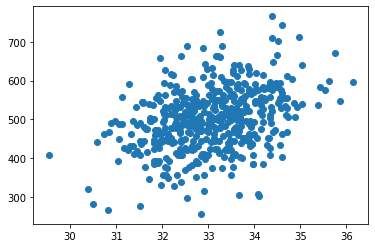

In [8]:
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'])

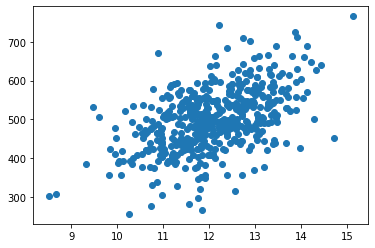

In [9]:
plt.scatter(df['Time on App'],df['Yearly Amount Spent'])

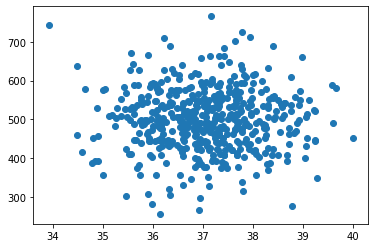

In [10]:
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'])

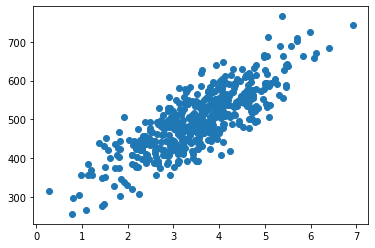

In [11]:
plt.scatter(df['Length of Membership'],df['Yearly Amount Spent'])

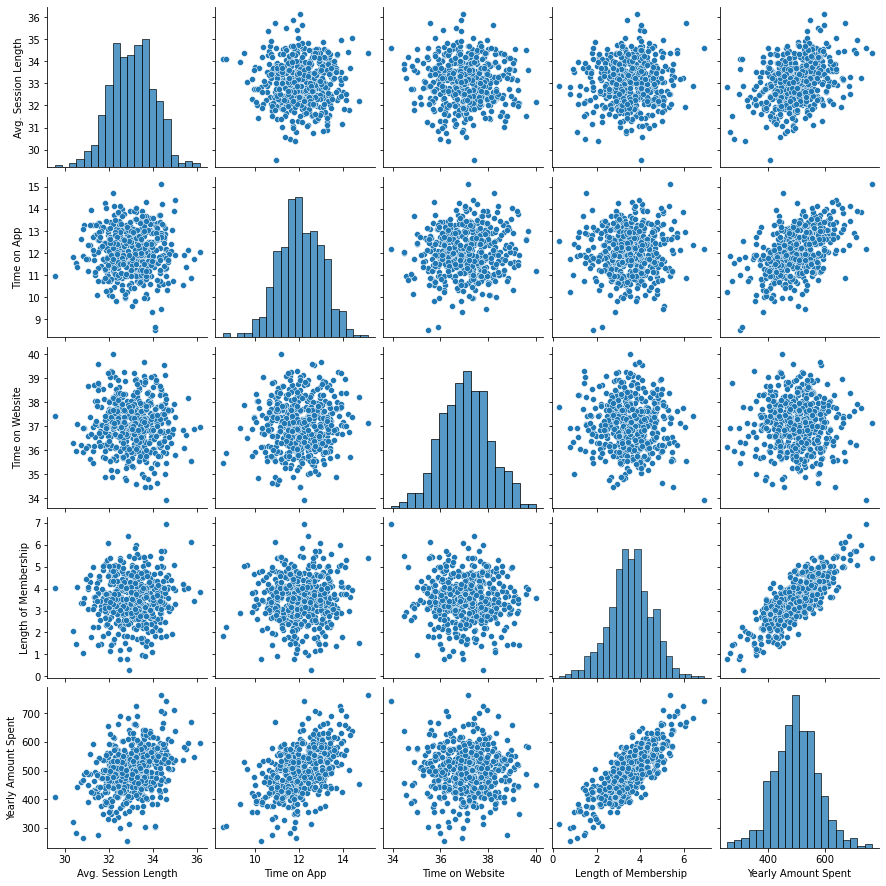

In [29]:
sns.pairplot(df)

<AxesSubplot:>

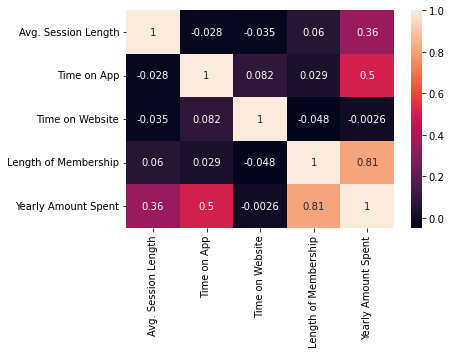

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
x = df.drop(['Yearly Amount Spent'],axis=1)
y = df['Yearly Amount Spent']

In [15]:
#split data for training and testing
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2)

In [16]:
#creating and training model
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_predict = model.predict(x_test)
y_predict

array([437.56523136, 481.96609656, 569.03992616, 414.68831365,
       408.39315487, 561.24447384, 401.71066832, 451.65547529,
       447.02334155, 377.20263715, 596.41776198, 481.06670377,
       542.67807697, 529.10225442, 369.98752289, 347.00224617,
       413.98234275, 477.38563284, 633.55735909, 555.96962094,
       491.89997536, 609.84223296, 470.34675553, 426.32608912,
       500.84728246, 442.56548959, 491.14027753, 328.16091778,
       540.36020431, 605.2204466 , 570.8406809 , 391.20394511,
       596.65105714, 536.64785041, 569.47496831, 444.48129378,
       423.21101397, 418.64939142, 635.45551948, 537.34620088,
       424.71242305, 529.37986125, 495.13547472, 518.32247282,
       523.41527242, 685.84917132, 586.31955269, 450.29941255,
       562.43832767, 622.028137  , 560.04282962, 549.46662578,
       549.97132027, 482.37392435, 518.16568187, 527.74309626,
       313.22562059, 381.14203999, 335.81202152, 546.18394879,
       447.02731192, 339.75276721, 553.85765214, 571.46

In [18]:
model.score(x_test,y_test)

0.9837563959610413

In [19]:
y_predict = model.predict(x_test)

Scatter plot of real test value and predicted value

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predict data')

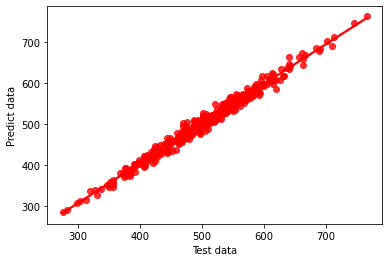

In [20]:
import seaborn as sns
sns.regplot(y_test,y_predict,color='red')
plt.xlabel('Test data')
plt.ylabel('Predict data')

Evaluating model

In [21]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predict)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predict)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predict))))

MAE: 8.011272454748733
MSE: 100.70967870581683
RMSE: 10.035421202212532


C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

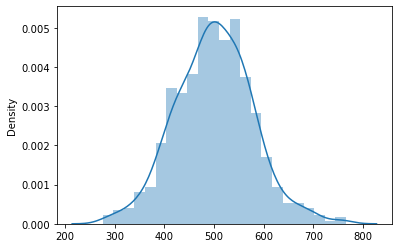

In [22]:
sns.distplot((y_test,y_predict))

In [23]:
pd.DataFrame(model.coef_ , x.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,24.155152
Time on App,38.009100
Time on Website,1.546984
Length of Membership,61.579857


Coefficient of time on app is 38.009100 and time on website is 1.546984 with the help of this values we i can say that the company need to focus on their application more than